# Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

- You can load the data set like this:

> import seaborn as sns  
> sns.load_dataset('tips')

### Acquire

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df = df.replace({'Female':0, 'Male':1})
df = df.rename(columns={'sex':'is_male'})

In [8]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [9]:
df = df.replace({'No':0, 'Yes':1})
df = df.rename(columns={'smoker':'is_smoker'})

In [10]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [11]:
df = df.replace({'Lunch':0, 'Dinner':1})
df = df.rename(columns={'time':'is_Dinner'})

In [12]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [13]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [14]:
df.describe()

,total_bill,tip,is_male,is_smoker,is_Dinner,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,0.721311,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,1.000000,6.000000


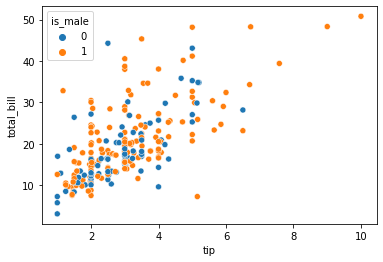

In [15]:
sns.scatterplot(x=df.tip, y=df.total_bill, data=df, hue=df.is_male)

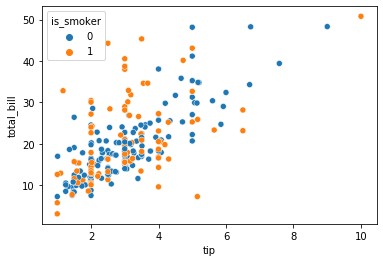

In [16]:
sns.scatterplot(x=df.tip, y=df.total_bill, data=df, hue=df.is_smoker)

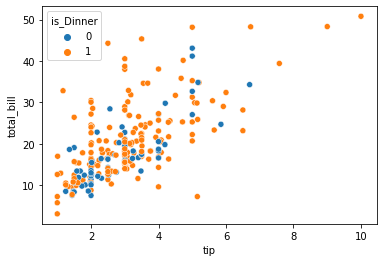

In [17]:
sns.scatterplot(x=df.tip, y=df.total_bill, data=df, hue=df.is_Dinner)

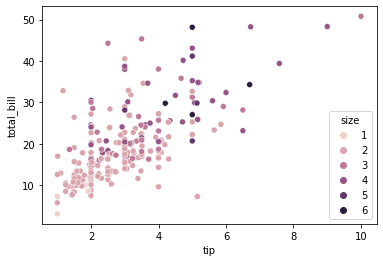

In [18]:
sns.scatterplot(x=df.tip, y=df.total_bill, data=df, hue=df['size'])

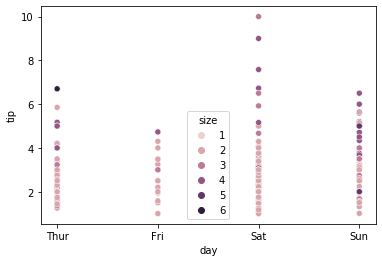

In [19]:
sns.scatterplot(x=df.day, y=df.tip, data=df, hue=df['size'])

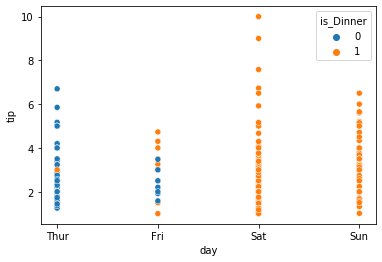

In [20]:
sns.scatterplot(x=df.day, y=df.tip, data=df, hue=df.is_Dinner)

### T-test
Compare a categorical and continuous variable
- categorical = is_Dinner = 1
- continuous = tip

null hypothesis: there is no significant difference between dinner time and tip size  
alternative hypothesis: tips are smaller or larger during dinner

In [29]:
from scipy.stats import ttest_1samp

alpha = .05

dinner = df[df.is_Dinner == 1]

stats, p = ttest_1samp(dinner.tip, df.tip.mean())

print(p)

0.33624554132761764


### Chi-squared
- two categories needed
- can create category for tip percent
- another category as weekedn or not

In [ ]:
df['tip_percent'] = (df.tip / df.total_bill) * 100

In [47]:
df['is_20_percent'] = df.tip_percent > 20

In [41]:
df['is_weekend'] = df.day.replace({'Thur':0,'Fri':0,'Sat':1,'Sun':1})

In [44]:
df.tip_percent.min(), df.tip_percent.max()

(3.563813585135547, 71.0344827586207)

In [52]:
observed = pd.crosstab(df.is_weekend, df.is_20_percent)

In [53]:
from scipy.stats import chi2_contingency

chi2, p, degf, expected = chi2_contingency(observed)

In [55]:
print('p-value', p)

p-value 0.8373768175568317
